# Exploratory Data Analysis
# Install

In [1]:
%pip install pandas-summary

Note: you may need to restart the kernel to use updated packages.


# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_summary import DataFrameSummary

# Data
* The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-comsuming task
* Predicting the age of abalone from physical measurements
* Other measurements, which are easier to obtain, are used to predict the age

In [3]:
columns = [
  'sex',		            #nominal		        M, F, and I (infant)
	'length',		        #continuous	mm	        Longest shell measurement
	'diameter',	            #continuous	mm	        perpendicular to length
	'height',		        #continuous	mm	        with meat in shell
	'whole_weight',	        #continuous	grams	    whole abalone
	'shucked_weight',	    #continuous	grams	    weight of meat
	'viscera_weight',	    #continuous	grams	    gut weight (after bleeding)
	'shell_weight',	        #continuous	grams	    after being dried
	'rings',		        #integer		        +1.5 gives the age in years
]

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=columns)

# EDA
* Goal:
    * Extract information from data
    * Get an overview of the data
* Use a variety of techniques to display and summarise data
    * People are good at seeing patterns
    * Use visualisations to view data
* Help form opinions & identify relationships
* Look for problems in data
    * Missing values
    * Outliers
# Overview
## Observations

In [5]:
len(df)

4177

## View

In [6]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
## Types

In [8]:
df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

## Extended Stats

In [9]:
dfs = DataFrameSummary(df)
dfs.columns_stats

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
counts,4177,4177,4177,4177,4177,4177,4177,4177,4177
uniques,3,134,111,51,2429,1515,880,926,28
missing,0,0,0,0,0,0,0,0,0
missing_perc,0%,0%,0%,0%,0%,0%,0%,0%,0%
types,categorical,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


# Unvariate Analysis
* Investigate:
    * What parameters describe each part of the data?
    * What does the distribution of the data look like?
    * Are there outliers or missing values in the data?
    * Does the data look normal or is it skewed?
## Toolkits
* Adding package called DataFrameSummary
* Look at three different graphics packages
    * Matplotlib
    * Pandas (Built in)
    * Seaborn
## Length

In [10]:
# Describe returns a handful of useful properties
pd.DataFrame(df.length.describe())

,length
count,4177.000000
mean,0.523992
std,0.120093
min,0.075000
25%,0.450000
50%,0.545000
75%,0.615000
max,0.815000


In [11]:
# Extended view of data in frame
dfs['length']

mean                                                                 0.523992
std                                                                  0.120093
variance                                                             0.014422
min                                                                     0.075
max                                                                     0.815
mode                                                                     0.55
5%                                                                      0.295
25%                                                                      0.45
50%                                                                     0.545
75%                                                                     0.615
95%                                                                      0.69
iqr                                                                     0.165
kurtosis                                                        

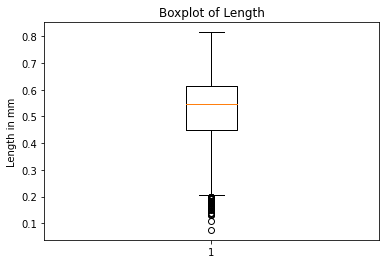

In [12]:
# Matplotlib boxplot
plt.boxplot(df.length)
plt.title('Boxplot of Length')
plt.ylabel('Length in mm');

# Helpful tips:
	# Semi-Colon on last plot statement

<AxesSubplot:xlabel='length', ylabel='Count'>

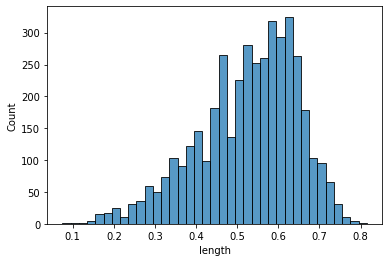

In [13]:
# Show the distribution with a histogram
sns.histplot(df, x='length')

## Diameter

In [14]:
pd.DataFrame(df.diameter.describe())

,diameter
count,4177.000000
mean,0.407881
std,0.099240
min,0.055000
25%,0.350000
50%,0.425000
75%,0.480000
max,0.650000


c:\Users\Lucas\anaconda3\envs\data-science-notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Diameter in mm')

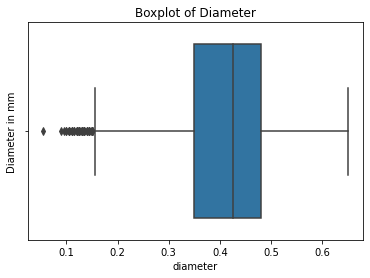

In [15]:
# Seaborn boxplot
sns.boxplot(df.diameter)
plt.title('Boxplot of Diameter')
plt.ylabel('Diameter in mm')

<AxesSubplot:xlabel='diameter', ylabel='Count'>

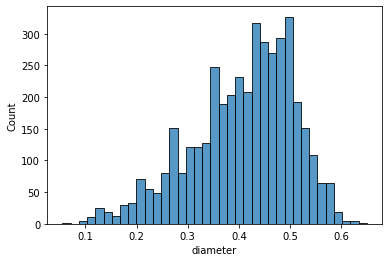

In [16]:
# Show the distribution with a histogram
sns.histplot(df, x='diameter')

## Height

In [17]:
pd.DataFrame(df.height.describe())

,height
count,4177.000000
mean,0.139516
std,0.041827
min,0.000000
25%,0.115000
50%,0.140000
75%,0.165000
max,1.130000


c:\Users\Lucas\anaconda3\envs\data-science-notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Height in mm')

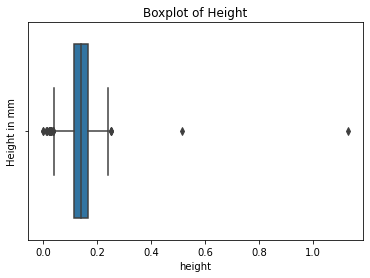

In [18]:
sns.boxplot(df.height)
plt.title('Boxplot of Height')
plt.ylabel('Height in mm')

<AxesSubplot:xlabel='height', ylabel='Count'>

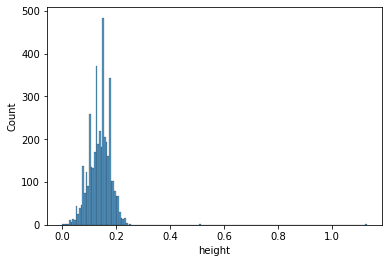

In [19]:
# Show the distribution with a histogram
# Are there outliers?
sns.histplot(df, x='height')

## Weight
* We're going to look at all three weights
* Shell, viscera and shucked

In [20]:
weights = ['shell_weight', 'viscera_weight', 'shucked_weight']
pd.DataFrame(df[weights].describe())

,shell_weight,viscera_weight,shucked_weight
count,4177.000000,4177.000000,4177.000000
mean,0.238831,0.180594,0.359367
std,0.139203,0.109614,0.221963
min,0.001500,0.000500,0.001000
25%,0.130000,0.093500,0.186000
50%,0.234000,0.171000,0.336000
75%,0.329000,0.253000,0.502000
max,1.005000,0.760000,1.488000


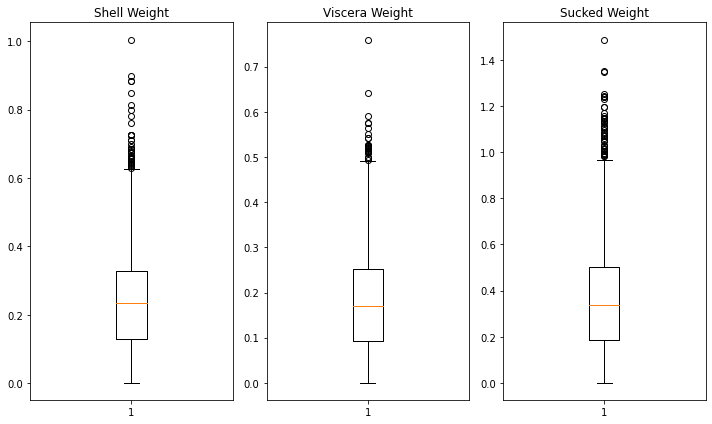

In [21]:
# We can arrange plots together using subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
axes[0].boxplot(df.shell_weight)
axes[0].set_title('Shell Weight')

axes[1].boxplot(df.viscera_weight)
axes[1].set_title('Viscera Weight')

axes[2].boxplot(df.shucked_weight)
axes[2].set_title('Sucked Weight')

fig.tight_layout()

<AxesSubplot:xlabel='variable', ylabel='value'>

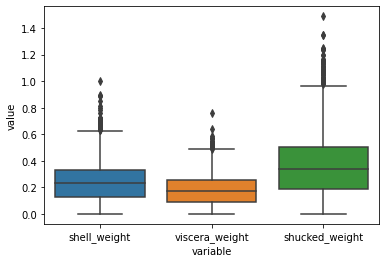

In [22]:
# Looking at a Seaborn approach (and an idea use for melt)
sns.boxplot(x="variable", y="value", data=pd.melt(df[weights]))

<AxesSubplot:ylabel='Count'>

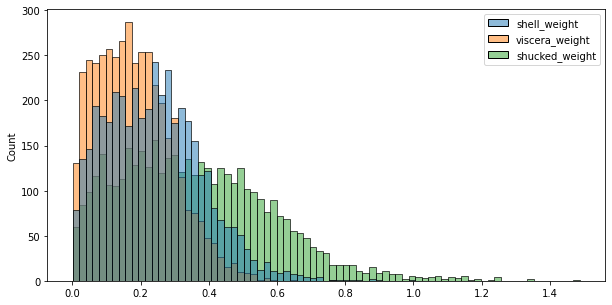

In [23]:
# Plot all values together
plt.figure(figsize=(10,5))
sns.histplot(df[weights])

## Rings

In [24]:
# Describe
# Mean - First moment - expected value of the distribution
# Variance - Second moment - The spread or variability of the distribution
# Skewness - Third central moment looks at how lopsided the distribution is (sign left / right)
# Kurtosis - Fourth central moemnt looks at heavieness of tails (always +)
dfs['rings']

mean                         9.933684
std                          3.224169
variance                    10.395266
min                                 1
max                                29
mode                                9
5%                                6.0
25%                               8.0
50%                               9.0
75%                              11.0
95%                              16.0
iqr                               3.0
kurtosis                     2.330687
skewness                     1.114102
sum                             41493
mad                          2.362462
cv                           0.324569
zeros_num                           0
zeros_perc                         0%
deviating_of_mean                  62
deviating_of_mean_perc          1.48%
deviating_of_median               194
deviating_of_median_perc        4.64%
top_correlations                     
counts                           4177
uniques                            28
missing     

c:\Users\Lucas\anaconda3\envs\data-science-notebook\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rings'>

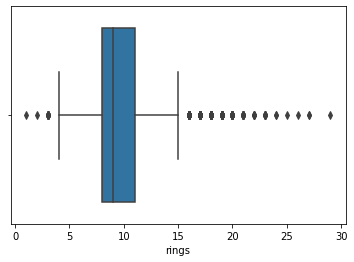

In [25]:
# Boxplot
sns.boxplot('rings', data=df)

# Univariate Analysis - Categorical
## Sex
* Categorical variable with 3 levels
* Male / Female / Infant
## Summary

In [26]:
# How many Male/Female/Infants are there in the dataset?
df.groupby('sex').size()

sex
F    1307
I    1342
M    1528
dtype: int64

In [27]:
# Not a lot of info in data frame summary
dfs['sex']

top                 M: 1528
counts                 4177
uniques                   3
missing                   0
missing_perc             0%
types           categorical
Name: sex, dtype: object

<AxesSubplot:xlabel='sex'>

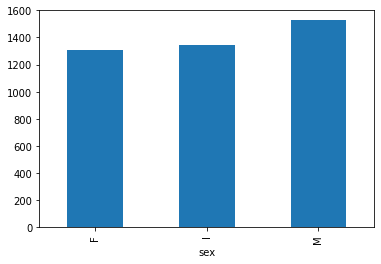

In [28]:
# Pandas has plotting capabilities built in
df.groupby('sex').size().plot.bar()

## Aggregations

In [29]:
# We can look at particular metrics given the category
df.groupby('sex').agg({'rings':['mean', 'median']})

rings       
          mean median
sex                  
F    11.129304   10.0
I     7.890462    8.0
M    10.705497   10.0

In [30]:
# We can get summary statistics over the dataset by sex
df.groupby('sex').mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


<AxesSubplot:title={'center':'rings'}, xlabel='sex'>

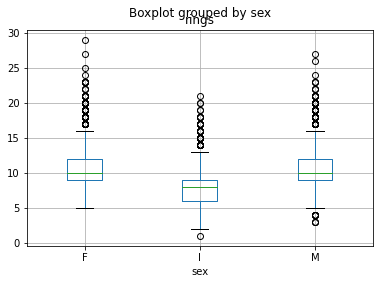

In [31]:
# Pandas - Box plot
df.boxplot(column='rings', by='sex')

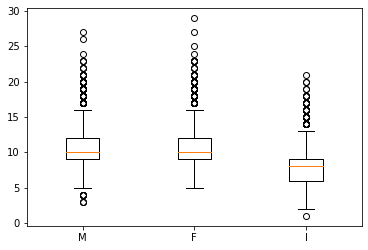

In [32]:
# Boxplots with matplotlib aren't awesome -- require some wrangling
data = []
for cat in df['sex'].unique():
	data.append({'Category': cat, 'Data': df[df.sex == cat]['rings']})
plt.boxplot([c['Data'] for c in data],
			labels=[c['Category'] for c in data],
			);

<AxesSubplot:xlabel='sex', ylabel='rings'>

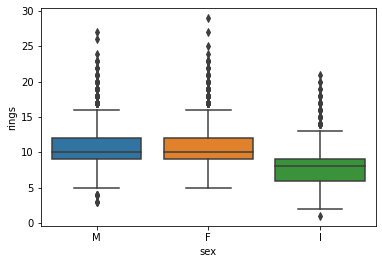

In [33]:
# Seaborn does a nice job here and very succinct
sns.boxplot(x=df.sex, y=df.rings)

<AxesSubplot:xlabel='sex', ylabel='rings'>

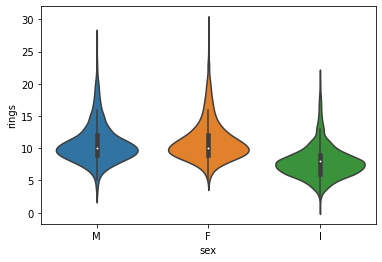

In [34]:
# A violin plot can illustrate the data in a descriptive manner
sns.violinplot(x=df.sex, y=df.rings)

Text(0.5, 1.0, 'Rings by Sex')

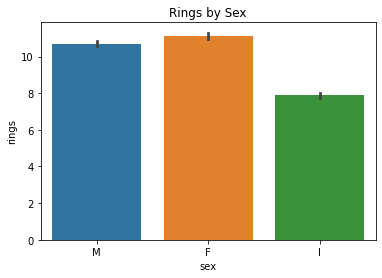

In [35]:
p = sns.barplot(x='sex', y='rings', data=df)
p.set_title('Rings by Sex')

# Multivariate Analysis
* Looking at how multiple data features interact
## Correlation
* Measures how strong a linear relationship is between two variables
* Correlation ranges from -1 to 1
    * Positive - Strong close to 1
    * Uncorrelated - Close to 0
    * Negative - Close to -1

<AxesSubplot:>

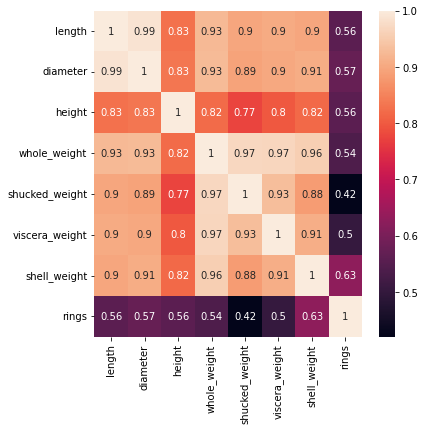

In [36]:
cor = df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(cor, annot=True)

## Pair Plots

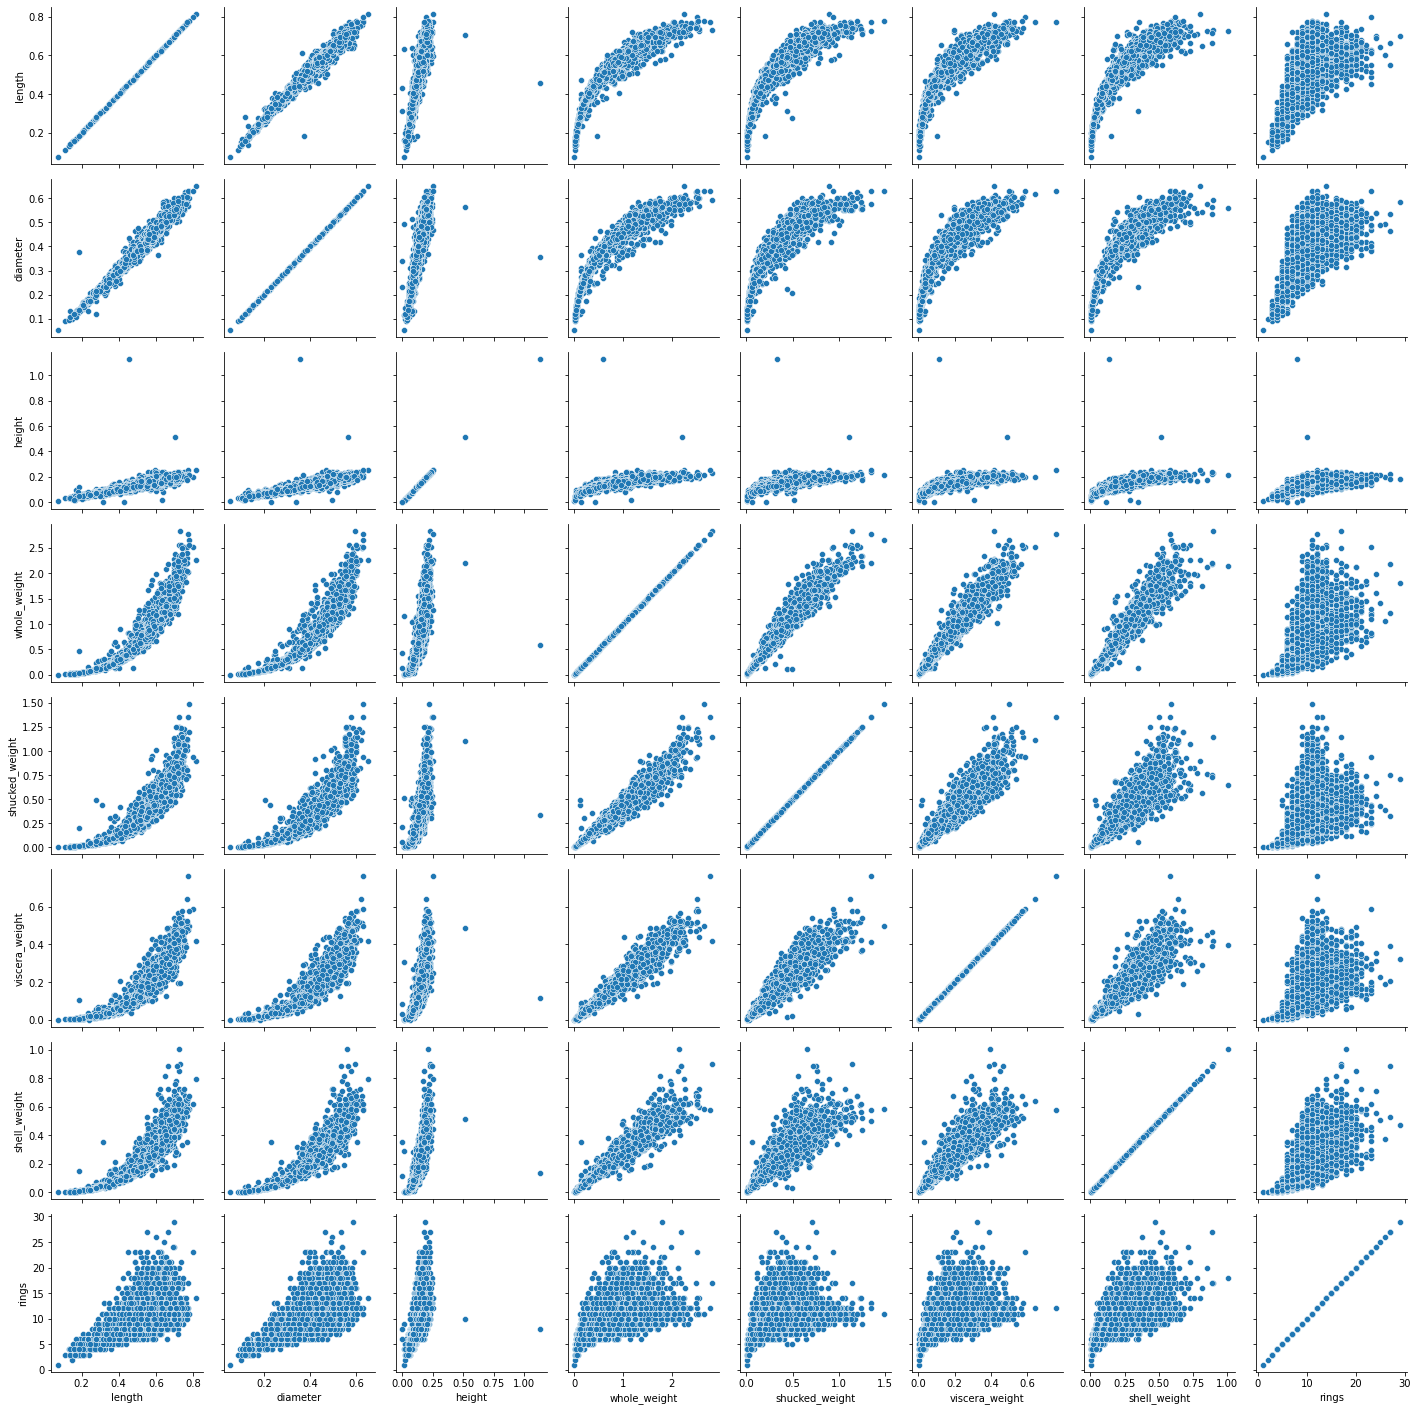

In [37]:
pg = sns.PairGrid(df)
pg.map(sns.scatterplot)

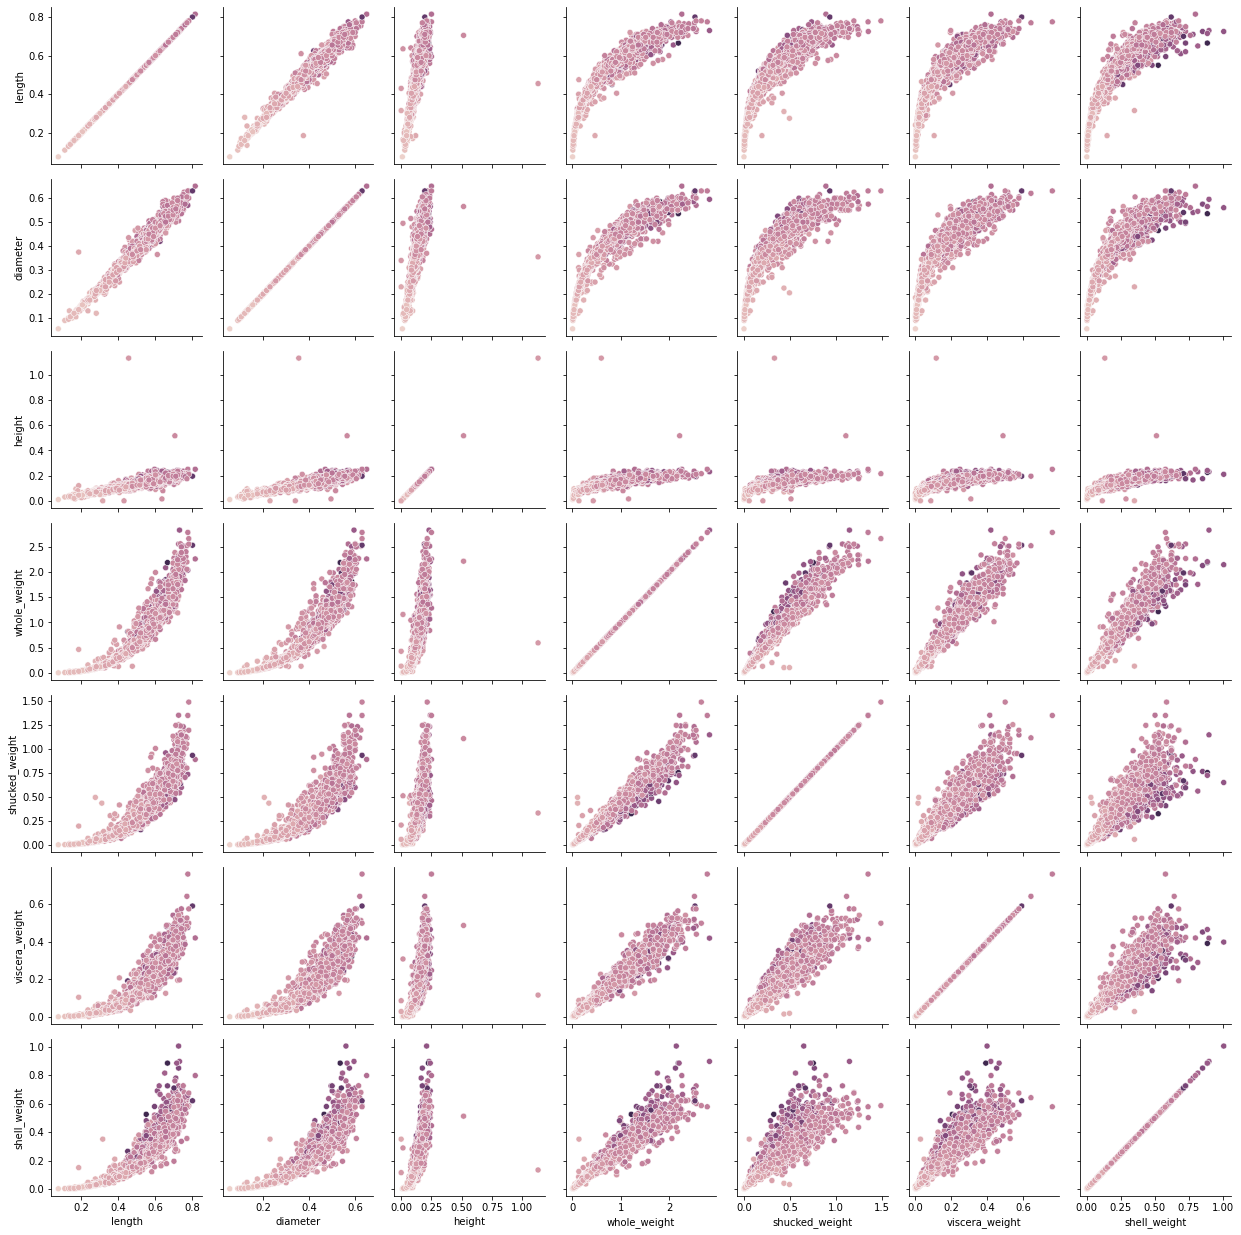

In [38]:
pg = sns.PairGrid(df, hue='rings')
pg.map(sns.scatterplot)

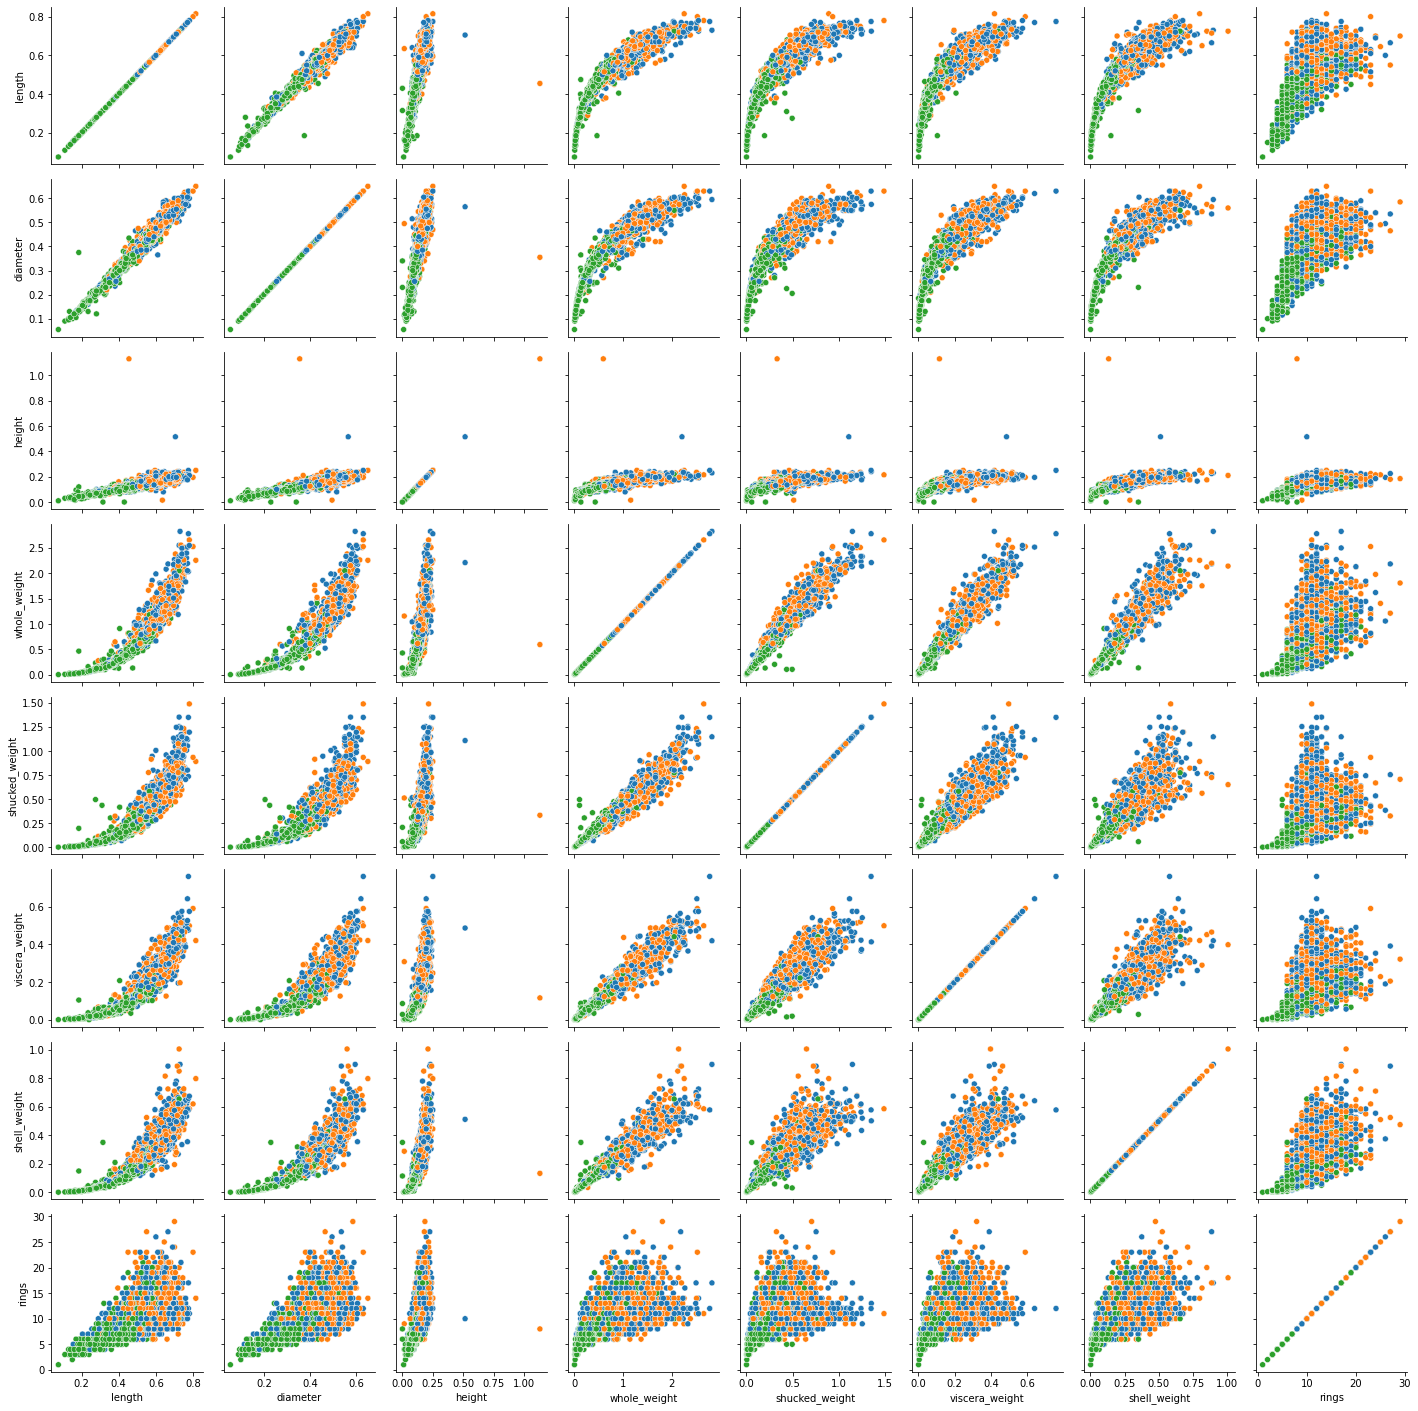

In [39]:
pg = sns.PairGrid(df, hue='sex')
pg.map(sns.scatterplot)

<AxesSubplot:title={'center':'Whole Weight - Height'}, xlabel='whole_weight', ylabel='height'>

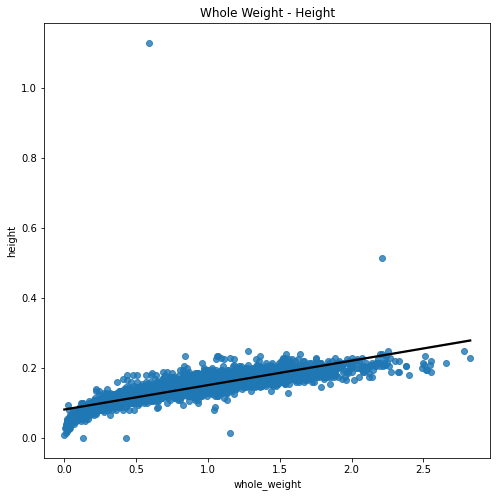

In [40]:
# Height - Whole Weight
# Adding a linear trend line
# Outliers in this plot (We'll look at handling them next session)
plt.figure(figsize=(8, 8))
plt.title('Whole Weight - Height')
sns.regplot(x='whole_weight', y='height', data=df, line_kws={'color': 'black'})

ModuleNotFoundError: No module named 'statsmodels'

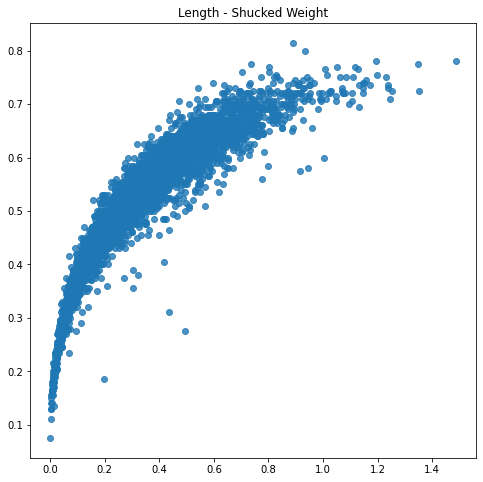

In [41]:
# Length - Shucked Weight
# Adding a linear trend line, not a great fit
plt.figure(figsize=(8, 8))
plt.title('Length - Shucked Weight')
sns.regplot(x='shucked_weight', y='length', data=df, line_kws={'color': 'black'}, lowess=True, ci=99)

# Helpful tips:
	# ci=95 (confidence intervals for the regression)
	# lowesws=True (Uses a technique called locally weighted linear regression to smooth)


<Figure size 576x576 with 0 Axes>

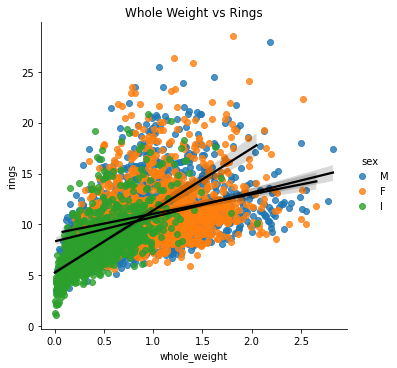

In [ ]:
# What about a fit line for male, female and infant?
plt.figure(figsize=(8, 8))
sns.lmplot(x='whole_weight', y='rings', hue='sex', data=df,
		   y_jitter=True, line_kws={'color': 'black'}, ci=99)
plt.title('Whole Weight vs Rings');